Abdul Jabbar Robbani (211102310)

Tugas Pengenalan Pola

Library yang digunakan sebagai berikut:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Menghubungkan Google Colab dengan Google Drive [Dataset](https://drive.google.com/file/d/1cdRWnoIkH9lm92c6gNcRHNmMsC8GkmV9/view?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Membaca file CSV yang disimpan di Google Drive

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Diabetes.csv")
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


Memberikan informasi tentang struktur DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


Menghitung korelasi antara semua pasangan kolom dalam DataFrame

In [ ]:
df.corr()

,glucose,bloodpressure,diabetes
glucose,1.000000,-0.164553,0.031585
bloodpressure,-0.164553,1.000000,-0.808303
diabetes,0.031585,-0.808303,1.000000


Memisahkan dataset menjadi fitur (X) dan target (y), membagi dataset menjadi data latih dan data uji, membuat dan melatih model Naive Bayes Gaussian, yang kemudian siap untuk melakukan prediksi.

In [ ]:
X=df.drop(columns='diabetes')
y=df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
bayes_model = GaussianNB()
bayes_model.fit(X_train,y_train)

GaussianNB()

Menggunakan model Naive Bayes Gaussian (bayes_model) untuk melakukan prediksi pada data uji (X_test) dan menyimpan hasil prediksi dalam variabel y_pred. Hasil prediksi tersebut kemudian ditampilkan.

In [ ]:
y_pred = bayes_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0])

Mengevaluasi performa model dengan menggunakan beberapa metrik

In [ ]:
print(f"Accuracy score - {accuracy_score(y_test,y_pred)}")
print(f"Confusion matrix : \n {confusion_matrix(y_test,y_pred)}")
print(f"classification report : \n-{classification_report(y_test,y_pred)}")

Accuracy score - 0.9296482412060302
Confusion matrix : 
 [[86  7]
 [ 7 99]]
classification report : 
-              precision    recall  f1-score   support

           0       0.92      0.92      0.92        93
           1       0.93      0.93      0.93       106

    accuracy                           0.93       199
   macro avg       0.93      0.93      0.93       199
weighted avg       0.93      0.93      0.93       199



Generate confusion matrix

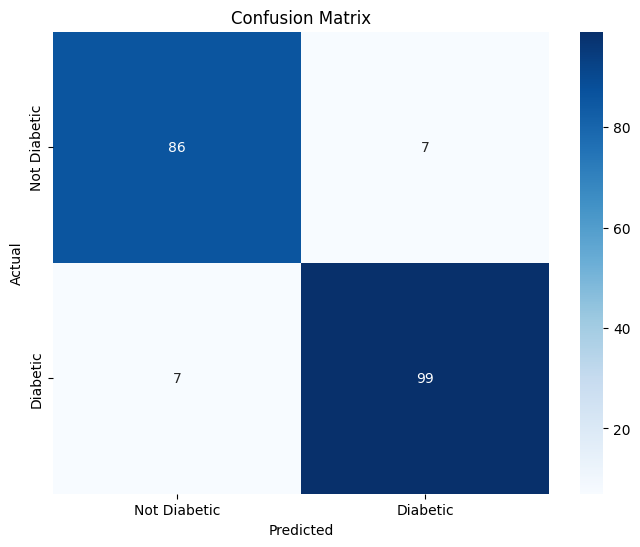

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Diabetic', 'Diabetic'],
            yticklabels=['Not Diabetic', 'Diabetic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
